In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score, confusion_matrix
import seaborn as sns
sns.set()

In [92]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00471/Data_for_UCI_named.csv')

In [93]:
data

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.930406,9.487627,2.376523,6.187797,3.343416,-0.658054,-1.449106,-1.236256,0.601709,0.779642,0.813512,0.608385,0.023892,unstable
9996,3.392299,1.274827,2.954947,6.894759,4.349512,-1.663661,-0.952437,-1.733414,0.502079,0.567242,0.285880,0.366120,-0.025803,stable
9997,2.364034,2.842030,8.776391,1.008906,4.299976,-1.380719,-0.943884,-1.975373,0.487838,0.986505,0.149286,0.145984,-0.031810,stable
9998,9.631511,3.994398,2.757071,7.821347,2.514755,-0.966330,-0.649915,-0.898510,0.365246,0.587558,0.889118,0.818391,0.037789,unstable


In [94]:
data.shape

(10000, 14)

In [95]:
data.isnull().sum()

tau1     0
tau2     0
tau3     0
tau4     0
p1       0
p2       0
p3       0
p4       0
g1       0
g2       0
g3       0
g4       0
stab     0
stabf    0
dtype: int64

In [96]:
data.describe()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.250000,5.250001,5.250004,5.249997,3.750000,-1.250000,-1.250000,-1.250000,0.525000,0.525000,0.525000,0.525000,0.015731
std,2.742548,2.742549,2.742549,2.742556,0.752160,0.433035,0.433035,0.433035,0.274256,0.274255,0.274255,0.274255,0.036919
min,0.500793,0.500141,0.500788,0.500473,1.582590,-1.999891,-1.999945,-1.999926,0.050009,0.050053,0.050054,0.050028,-0.080760
25%,2.874892,2.875140,2.875522,2.874950,3.218300,-1.624901,-1.625025,-1.624960,0.287521,0.287552,0.287514,0.287494,-0.015557
50%,5.250004,5.249981,5.249979,5.249734,3.751025,-1.249966,-1.249974,-1.250007,0.525009,0.525003,0.525015,0.525002,0.017142
75%,7.624690,7.624893,7.624948,7.624838,4.282420,-0.874977,-0.875043,-0.875065,0.762435,0.762490,0.762440,0.762433,0.044878
max,9.999469,9.999837,9.999450,9.999443,5.864418,-0.500108,-0.500072,-0.500025,0.999937,0.999944,0.999982,0.999930,0.109403


In [97]:
data.drop(columns = 'stab',inplace = True)

In [98]:
data

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,unstable
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.930406,9.487627,2.376523,6.187797,3.343416,-0.658054,-1.449106,-1.236256,0.601709,0.779642,0.813512,0.608385,unstable
9996,3.392299,1.274827,2.954947,6.894759,4.349512,-1.663661,-0.952437,-1.733414,0.502079,0.567242,0.285880,0.366120,stable
9997,2.364034,2.842030,8.776391,1.008906,4.299976,-1.380719,-0.943884,-1.975373,0.487838,0.986505,0.149286,0.145984,stable
9998,9.631511,3.994398,2.757071,7.821347,2.514755,-0.966330,-0.649915,-0.898510,0.365246,0.587558,0.889118,0.818391,unstable


In [99]:
#from sklearn.preprocessing import LabelEncoder

In [100]:
#encoder = LabelEncoder()
#data['stabf'] = encoder.fit_transform(data['stabf'])

In [101]:
X = data.drop(columns='stabf')
y = data['stabf']

In [102]:
#split the data into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [103]:
y_train

2694    unstable
5140    unstable
2568    unstable
3671    unstable
7427    unstable
          ...   
2895      stable
7813      stable
905     unstable
5192    unstable
235       stable
Name: stabf, Length: 8000, dtype: object

In [104]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['stabf'] = encoder.fit_transform(data['stabf'])

In [105]:
#scaling
from sklearn.preprocessing import StandardScaler

In [106]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
x_test_scaled.shape

(2000, 12)

In [107]:
from sklearn.ensemble import RandomForestClassifier

In [108]:
RFC = RandomForestClassifier(random_state = 1)
RFC.fit(x_train_scaled,y_train)

RandomForestClassifier(random_state=1)

In [109]:
RFC_pred = RFC.predict(x_test_scaled)

In [110]:
RFC_pred

array(['unstable', 'unstable', 'stable', ..., 'stable', 'stable',
       'unstable'], dtype=object)

In [111]:
#do for recall and f1 score
from sklearn.metrics import classification_report

In [112]:
print(classification_report(y_test, RFC_pred, digits = 4))

              precision    recall  f1-score   support

      stable     0.9191    0.8778    0.8980       712
    unstable     0.9341    0.9573    0.9456      1288

    accuracy                         0.9290      2000
   macro avg     0.9266    0.9176    0.9218      2000
weighted avg     0.9288    0.9290    0.9286      2000



In [113]:
data = [['RandomForestClassifier', 0.9290, 0.9341, 0.9573, 0.9456]]
result1 = pd.DataFrame(data ,columns = ['Model','Accuracy', 'Precision', 'Recall', 'f1-Score'])
result1

,Model,Accuracy,Precision,Recall,f1-Score
0,RandomForestClassifier,0.929,0.9341,0.9573,0.9456


In [114]:
#extra tree classifier
from sklearn.ensemble import ExtraTreesClassifier
tree = ExtraTreesClassifier(random_state = 1)
tree.fit(x_train_scaled, y_train)
tree_pred = tree.predict(x_test_scaled)

In [115]:
tree_pred

array(['unstable', 'unstable', 'stable', ..., 'stable', 'unstable',
       'unstable'], dtype=object)

In [116]:
print(classification_report(y_test, tree_pred, digits = 4))

              precision    recall  f1-score   support

      stable     0.9410    0.8511    0.8938       712
    unstable     0.9218    0.9705    0.9455      1288

    accuracy                         0.9280      2000
   macro avg     0.9314    0.9108    0.9197      2000
weighted avg     0.9287    0.9280    0.9271      2000



In [117]:
data = [['ExtraTreesClassifier', 0.9280, 0.9218, 0.9705, 0.9455]]
result2 = pd.DataFrame(data ,columns = ['Model','Accuracy', 'Precision', 'Recall', 'f1-Score'])
result2

,Model,Accuracy,Precision,Recall,f1-Score
0,ExtraTreesClassifier,0.928,0.9218,0.9705,0.9455


In [118]:
from sklearn.model_selection import RandomizedSearchCV

In [119]:
n_estimators = [50, 100, 300, 500, 1000]
min_samples_split = [2,3,5,7,9]
min_samples_leaf = [1,2,4,6,8]
max_features = ['auto','sqrt','log2',None]
#max_features = ['sqrt']
hyperparameter_grid = {'n_estimators': n_estimators, 'min_samples_leaf': min_samples_leaf, 'min_samples_split': min_samples_split, 'max_features': max_features} 

In [121]:
clf = RandomizedSearchCV(ExtraTreesClassifier(random_state = 1),hyperparameter_grid, random_state = 1 )
search = clf.fit(x_train_scaled, y_train)

In [122]:
tree_pred = clf.predict(x_test_scaled)
tree_pred

array(['unstable', 'unstable', 'stable', ..., 'stable', 'unstable',
       'unstable'], dtype=object)

In [123]:
search.best_params_.values()

dict_values([1000, 2, 8, None])

In [124]:
tree_param = ExtraTreesClassifier(n_estimators = 1000, min_samples_split = 2, min_samples_leaf = 8, max_features = None,random_state = 1)
tree_param.fit(x_train_scaled, y_train)
tree_param_pred = tree_param.predict(x_test_scaled)

In [126]:
print(classification_report(y_test, tree_param_pred, digits = 4))

              precision    recall  f1-score   support

      stable     0.9211    0.8694    0.8945       712
    unstable     0.9300    0.9589    0.9442      1288

    accuracy                         0.9270      2000
   macro avg     0.9256    0.9141    0.9193      2000
weighted avg     0.9268    0.9270    0.9265      2000



In [127]:
#check the values
data = [['RandomizedSearchCV', 0.9280, 0.9301, 0.9604, 0.9450]]
result3 = pd.DataFrame(data ,columns = ['Model','Accuracy', 'Precision', 'Recall', 'f1-Score'])
result3

,Model,Accuracy,Precision,Recall,f1-Score
0,RandomizedSearchCV,0.928,0.9301,0.9604,0.945


In [131]:
feature_importance_scaled = tree_param.feature_importances_

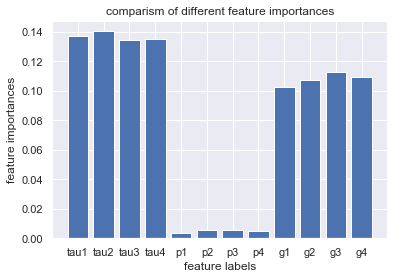

In [132]:
plt.bar(X.columns, feature_importance_scaled)
plt.xlabel('feature labels')
plt.ylabel('feature importances')
plt.title('comparism of different feature importances')
plt.show()

In [133]:
max(tree_param.feature_importances_),min(tree_param.feature_importances_)

(0.14050750384993677, 0.003683422151688322)

tau2 and p1 respectively are the most importand and least important features

In [135]:
#for xgboost using gradient boosting
from xgboost import XGBClassifier
#from xgboost import XGBRFClassifier
extreme1 = XGBClassifier(max_depth = 3, learning_rate = 0.1)
extreme1.fit(x_train_scaled, y_train)
extreme1_pred = extreme1.predict(x_test_scaled)

In [136]:
extreme1_pred

array(['unstable', 'unstable', 'stable', ..., 'stable', 'unstable',
       'unstable'], dtype=object)

In [137]:
print(classification_report(y_test, extreme1_pred,digits = 4))

              precision    recall  f1-score   support

      stable     0.9206    0.8469    0.8822       712
    unstable     0.9190    0.9596    0.9389      1288

    accuracy                         0.9195      2000
   macro avg     0.9198    0.9033    0.9105      2000
weighted avg     0.9195    0.9195    0.9187      2000



In [138]:
data = [['XGBClassifier', 0.9195, 0.9190, 0.9596, 0.9389]]
result4 = pd.DataFrame(data ,columns = ['Model','Accuracy', 'Precision', 'Recall', 'f1-Score'])
result4

,Model,Accuracy,Precision,Recall,f1-Score
0,XGBClassifier,0.9195,0.919,0.9596,0.9389


In [139]:
#for lightgbm using LGBMClassifier
from lightgbm import LGBMClassifier
light = LGBMClassifier(random_state = 1)
light.fit(x_train_scaled, y_train)
light_pred = light.predict(x_test_scaled)

In [140]:
light_pred

array(['unstable', 'unstable', 'stable', ..., 'stable', 'unstable',
       'unstable'], dtype=object)

In [142]:
print(classification_report(y_test, light_pred,digits = 4))

              precision    recall  f1-score   support

      stable     0.9297    0.8919    0.9104       712
    unstable     0.9415    0.9627    0.9520      1288

    accuracy                         0.9375      2000
   macro avg     0.9356    0.9273    0.9312      2000
weighted avg     0.9373    0.9375    0.9372      2000



In [143]:
data = [['LGBMClassifier', 0.9375, 0.9415, 0.9627, 0.9520]]
result5 = pd.DataFrame(data ,columns = ['Model','Accuracy', 'Precision', 'Recall', 'f1-Score'])
result5

,Model,Accuracy,Precision,Recall,f1-Score
0,LGBMClassifier,0.9375,0.9415,0.9627,0.952


In [144]:
model_result = result1.append([result2, result3, result4, result5])

In [145]:
model_result

,Model,Accuracy,Precision,Recall,f1-Score
0,RandomForestClassifier,0.9290,0.9341,0.9573,0.9456
0,ExtraTreesClassifier,0.9280,0.9218,0.9705,0.9455
0,RandomizedSearchCV,0.9280,0.9301,0.9604,0.9450
0,XGBClassifier,0.9195,0.9190,0.9596,0.9389
0,LGBMClassifier,0.9375,0.9415,0.9627,0.9520


In [152]:
n_estimators = [50, 100, 300, 500, 1000]
min_samples_split = [2,3,5,7,9]
min_samples_leaf = [1,2,4,6,8]
max_features = ['auto','sqrt','log2',None]
#max_features = ['sqrt']
hyperparameter_grid = {'n_estimators': n_estimators, 'min_samples_leaf': min_samples_leaf, 'min_samples_split': min_samples_split, 'max_features': max_features} 

In [155]:
clf1 = RandomizedSearchCV(ExtraTreesClassifier(random_state = 1),hyperparameter_grid, cv=5, n_iter=10, scoring = 'accuracy', n_jobs = -1, verbose = 1, random_state = 1 )
search = clf1.fit(x_train_scaled, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.2min finished


In [156]:
tree_pred = clf1.predict(x_test_scaled)
tree_pred

array(['unstable', 'unstable', 'stable', ..., 'stable', 'unstable',
       'unstable'], dtype=object)

In [157]:
search.best_params_.values()

dict_values([1000, 2, 8, None])

In [158]:
tree_param = ExtraTreesClassifier(n_estimators = 1000, min_samples_split = 2, min_samples_leaf = 8, max_features = None,random_state = 1)
tree_param.fit(x_train_scaled, y_train)
tree_param_pred1 = tree_param.predict(x_test_scaled)

In [159]:
print(classification_report(y_test, tree_param_pred, digits = 4))

              precision    recall  f1-score   support

      stable     0.9211    0.8694    0.8945       712
    unstable     0.9300    0.9589    0.9442      1288

    accuracy                         0.9270      2000
   macro avg     0.9256    0.9141    0.9193      2000
weighted avg     0.9268    0.9270    0.9265      2000



In [ ]:
the accuracy was lower compaired to the one gotten earlier 